# 1. Réseaux de neurones Sequential

In [11]:
import numpy as np 
import pandas as pd
 
data_path = "datas/flood.csv"

In [3]:
import pandas as pd 
data = pd.read_csv(data_path)
print(data.head())

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

# 2. Traitement des données

In [12]:
target_col = "FloodProbability"
num_cols = [c for c in data.select_dtypes(include=[np.number]).columns if c != target_col]

# Supprimer les outliers pour obtenir une meilleure estimation des tendances centrales
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

MonsoonIntensity: 686 outliers
TopographyDrainage: 711 outliers
RiverManagement: 661 outliers
Deforestation: 682 outliers
Urbanization: 687 outliers
ClimateChange: 647 outliers
DamsQuality: 741 outliers
Siltation: 671 outliers
AgriculturalPractices: 683 outliers
Encroachments: 688 outliers
IneffectiveDisasterPreparedness: 656 outliers
DrainageSystems: 731 outliers
CoastalVulnerability: 747 outliers
Landslides: 645 outliers
Watersheds: 686 outliers
DeterioratingInfrastructure: 663 outliers
PopulationScore: 677 outliers
WetlandLoss: 674 outliers
InadequatePlanning: 670 outliers
PoliticalFactors: 722 outliers


In [14]:
# Enlever les outliers
data_clean = data.copy()

for col in num_cols:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data_clean[col] = data_clean[col].clip(lower, upper)

# 3. Séparation et normalisation des données

In [16]:
y = data_clean['FloodProbability']
X = data_clean.iloc[:,0:20]

In [17]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Entraînement du modèle

In [19]:
from keras.models import Sequential
from keras.layers import Dense 

model = Sequential([
    Dense(64,activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(1,activation = 'linear')
])

model.compile(optimizer = 'adam',
             loss = 'mae',
             metrics = ['mse'])

history = model.fit(X_train_scaled,y_train , epochs = 10 , validation_data = (X_test_scaled,y_test))


Epoch 1/10
1250/1250 [==============================] - 4s 2ms/step - loss: 0.0456 - mse: 0.0064 - val_loss: 0.0088 - val_mse: 1.3249e-04
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0063 - mse: 6.9140e-05 - val_loss: 0.0060 - val_mse: 5.6462e-05
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 3.2076e-05 - val_loss: 0.0031 - val_mse: 2.1590e-05
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0032 - mse: 2.2648e-05 - val_loss: 0.0028 - val_mse: 1.9319e-05
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 1.9709e-05 - val_loss: 0.0025 - val_mse: 2.0223e-05
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0025 - mse: 1.7371e-05 - val_loss: 0.0021 - val_mse: 1.7547e-05
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0023 - mse: 1.6178e-05 - val_loss: 0.0021 - val_mse: 1.5726e-05
Epoch 8/10

# 5. Test et Evaluation du modèle

In [20]:
loss , mae = model.evaluate(X_test_scaled,y_test,verbose = 0)
print('loss:',loss)
print('MAe:',mae)

loss: 0.0023931923788040876
MAe: 1.362174043606501e-05


In [24]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

313/313 [==============================] - 1s 2ms/step
MSE: 1.3621734666232913e-05
RMSE: 0.003690763425936823
MAE: 0.0023931908655166604
R2 Score: 0.9945307104160473


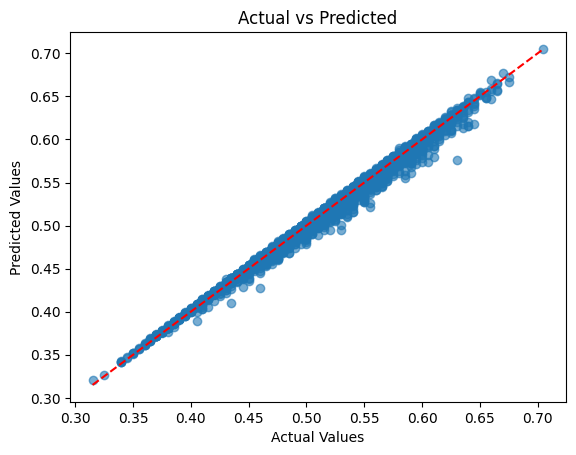

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [23]:
example_input = pd.DataFrame([{
    "MonsoonIntensity": 7,
    "TopographyDrainage": 5,
    "RiverManagement": 6,
    "Deforestation": 7,
    "Urbanization": 6,
    "ClimateChange": 7,
    "DamsQuality": 5,
    "Siltation": 6,
    "AgriculturalPractices": 6,
    "Encroachments": 5,
    "IneffectiveDisasterPreparedness": 6,
    "DrainageSystems": 6,
    "CoastalVulnerability": 5,
    "Landslides": 5,
    "Watersheds": 6,
    "DeterioratingInfrastructure": 6,
    "PopulationScore": 7,
    "WetlandLoss": 6,
    "InadequatePlanning": 6,
    "PoliticalFactors": 5
}])

# 🔍 Predict probability for this location
example_input_scaled = scaler.transform(example_input)
flood_probability = model.predict(example_input_scaled)[0][0]
print(f"🌊 Predicted Flood Probability: {flood_probability:.4f}")

1/1 [==============================] - 0s 52ms/step
🌊 Predicted Flood Probability: 0.5921


# 6. Sauvegarde du modèle

In [ ]:
import joblib
import os

# Création du dossier models s'il n'existe pas
models_dir = "models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Sauvegarde kearas
model.save(os.path.join(models_dir, "reseau_neurones_model.h5"))

# Sauvegarde du scaler et des features via joblib
joblib.dump(scaler, os.path.join(models_dir, "scaler.joblib"))
joblib.dump(X.columns.tolist(), os.path.join(models_dir, "features.joblib"))

print("Réseau de Neurones (.h5), scaler et features sauvegardés !")